In [1]:
"""Miniproject in Statistical Machine Learning course.
The project is to predict which songs, out of a data set of 200 songs, 
a teacher in the course will like. The training data consists of 750 songs,
which the teacher already has labeled with like or dislike.
The data consists not of the sound files themselves, but of song features extracted from them.

Made by Jonas Wikström

Song Features: {"acousticness","danceability","duration","energy","instrumentalness",
"key","liveness","loudness","mode","speechiness","tempo","time_signature","valence"}
"""

'Miniproject in Statistical Machine Learning course.\nThe project is to predict which songs, out of a data set of 200 songs, \na teacher in the course will like. The training data consists of 750 songs,\nwhich the teacher already has labeled with like or dislike.\nThe data consists not of the sound files themselves, but of song features extracted from them.\n\n\nSong Features: {"acousticness","danceability","duration","energy","instrumentalness",\n"key","liveness","loudness","mode","speechiness","tempo","time_signature","valence"}\n'

In [2]:
#imports
import numpy as np
import pandas as pd
import sklearn.linear_model as skl_lm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold

In [7]:
"""instantiates stuff """
#scalers
scaler = StandardScaler()
scaler_minmax = MinMaxScaler()
scaler_power = PowerTransformer()
scaler_maxabs = MaxAbsScaler()
scaler_robust = RobustScaler()
scaler_list = [scaler,scaler_minmax,scaler_power,scaler_maxabs,scaler_robust]
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 5)   
kf = KFold(n_splits = 10)
kf.get_n_splits(X)

10

In [8]:
"""Loading data"""

url = 'http://www.it.uu.se/edu/course/homepage/sml/project/training_data.csv';
songs = pd.read_csv(url, na_values='?').dropna();
songs.drop_duplicates(keep='first', inplace=False)

url_test = 'http://www.it.uu.se/edu/course/homepage/sml/project/songs_to_classify.csv'
songs_to_test = pd.read_csv(url_test, na_values='?').dropna();

X = songs[["acousticness","danceability","duration","energy","instrumentalness","key","liveness","loudness","mode","speechiness","tempo","time_signature","valence"]];
y = songs["label"];

In [9]:
"""Functions for validating score and scaling data"""
def getScore(Xtrain,ytrain,Xtest,ytest):
    model = LogisticRegression(solver='lbfgs')
    model.fit(Xtrain,ytrain)
    return model.score(Xtest,ytest)

def TestStandardization(model_input,Xtrain,Xtest):
    model = model_input
    model.fit(Xtrain)
    Xtrain = model.transform(Xtrain)
    Xtest = model.transform(Xtest)
    return Xtrain,Xtest


[0.8666666666666667, 0.8666666666666667, 0.88, 0.8533333333333334, 0.8666666666666667]


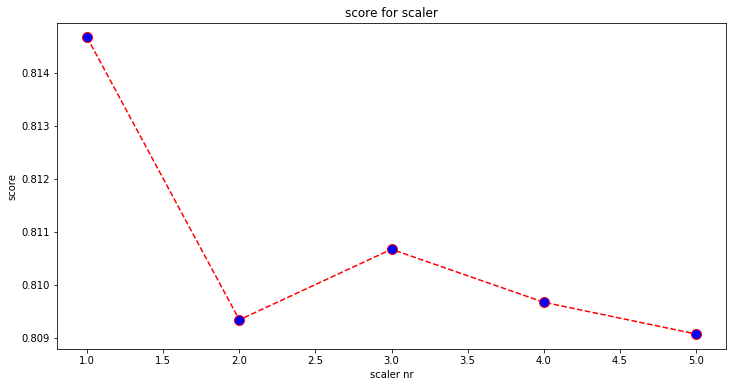

In [10]:
"""Validation function - plots the average score for 10fold cross validation with 5 different scalers"""

scores = []
average_score = []
scaler_score = []

fold_score_arr = []
for i in scaler_list:
    fold_score = 0;
    for train_index, test_index in kf.split(X):
        Xtrain, Xtest = X.loc[train_index], X.loc[test_index]
        ytrain, ytest = y.loc[train_index], y.loc[test_index]
        Xtrain, Xtest = TestStandardization(i,Xtrain,Xtest)
        Xtrain = rfe.fit_transform(Xtrain,ytrain)
        Xtest = rfe.transform(Xtest)
        if getScore(Xtrain,ytrain,Xtest,ytest) > fold_score:
            fold_score = getScore(Xtrain,ytrain,Xtest,ytest);
        scores.append(getScore(Xtrain,ytrain,Xtest,ytest))
    fold_score_arr.append(fold_score)    
    average_score = np.mean(scores)
    scaler_score.append(average_score)

plt.figure(figsize=(12, 6))
plt.plot(range(1, 6), scaler_score, color='red', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10)
plt.title('score for scaler')
plt.xlabel('scaler nr')
plt.ylabel('score')

print(fold_score_arr)

In [13]:
"""Function for making predictions"""

def make_predictions(scaler):
    Xtest = songs_to_test[["acousticness","danceability","duration","energy","instrumentalness","key","liveness","loudness","mode","speechiness","tempo","time_signature","valence"]];
    Xtest = scaler.transform(Xtest)
    Xtest = rfe.transform(Xtest)
    
    scaler.fit(X)
    Xtrain = scaler.transform(X)
    Xtrain = rfe.fit_transform(X,y)
    model = LogisticRegression(solver='lbfgs')
    model.fit(Xtrain,y)
    ypred = model.predict(Xtest);
    result = ypred;
    result2 = ''.join(str(i) for i in result)
    return(result2)

make_predictions(scaler)

'00010111101001101111101100111111011111010101010110011101100011001111101111110110110101111010011011111111110111110111101101111111101011111111100011111011001111101101101111111000111011101110100111100111'